**Q.1: Import data and check for null values, column info, and descriptive statistics**

In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Queries.csv")

# Checking for null values, column info, and descriptive statistics
print("###########################################")
print("NULL VALUES")
print(df.isnull().sum())  # Null values
print("###########################################")
print("COLUMN INFO")
print(df.info())          # Column info
print("###########################################")
print("DESCRIPTIVE STATISTICS")
print(df.describe())      # Descriptive statistics
print("###########################################")

###########################################
NULL VALUES
Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64
###########################################
COLUMN INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None
###########################################
DESCRIPTIVE STATISTICS
          Clicks   Impressions     Position
count  1000.0000   1000.000000  1000.000000
mean    172.2750   1939.466000     3.985930
std     281.0221   4856.702605     2.841842
min      48.0000     62.000000     1.000000
25%      64.0000    311.000000     2

**Q.2: Convert the CTR column from a percentage string to a float**

In [28]:
df['CTR'] = df['CTR'].str.rstrip('%').astype('float') / 100.0

#Printing updated values
print(df.head())


                                 Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  0.3583   
1                        thecleverprogrammer    2809         3456  0.8128   
2           python projects with source code    2077        73380  0.0283   
3  classification report in machine learning    2012         4959  0.4057   
4                      the clever programmer    1931         2528  0.7638   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09  


**Q.3: Analyze common words in each search query**

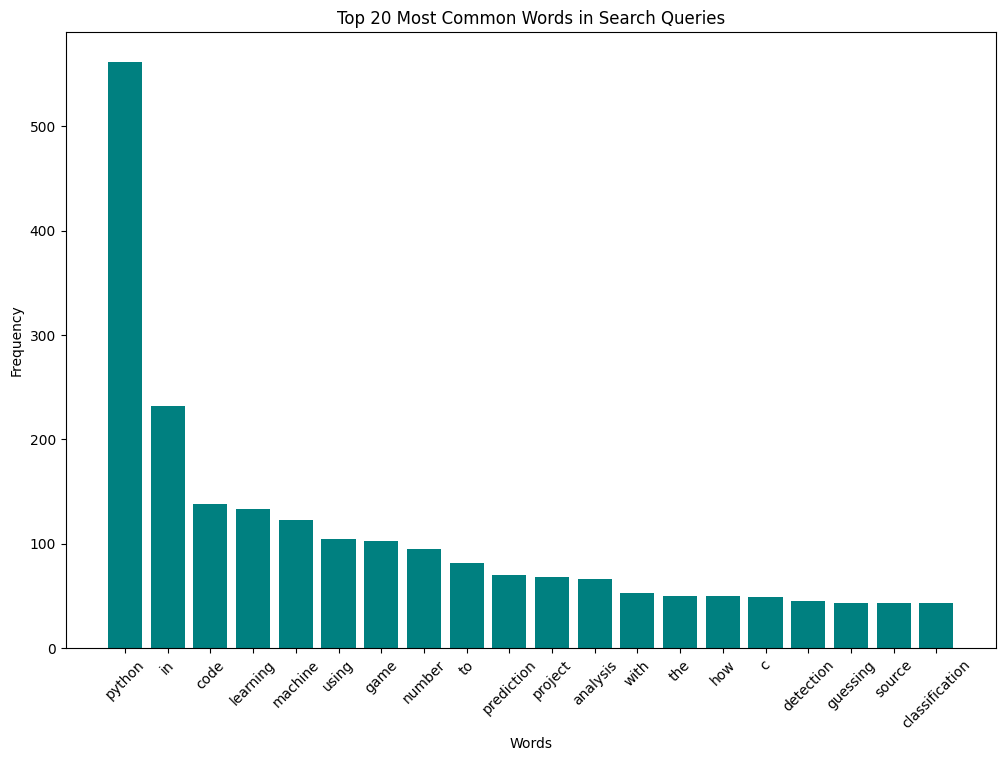

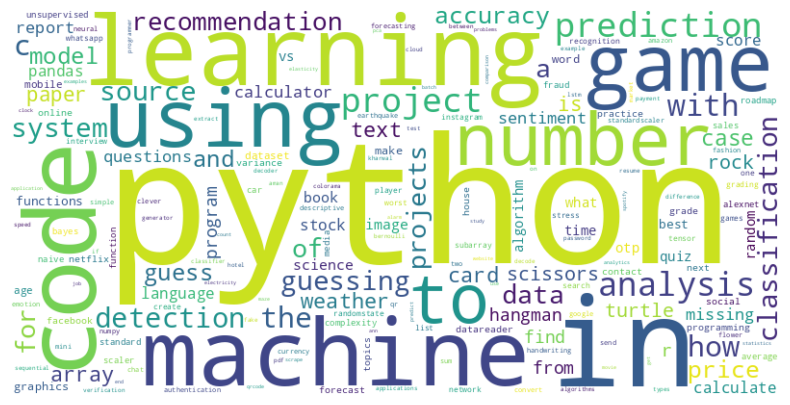

In [29]:
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to clean and split the queries into words
def clean_and_split_queries(query):
    words = re.sub(r'[^a-zA-Z\s]', '', query).lower().split()
    return words

# Apply the function to all queries and count the frequency of each word
all_words = df['Top queries'].apply(clean_and_split_queries).sum()
word_freq = Counter(all_words)

# Plot the word frequencies using a bar chart
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='teal')
plt.title('Top 20 Most Common Words in Search Queries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Q.4: Analyze the top queries by clicks and impressions**

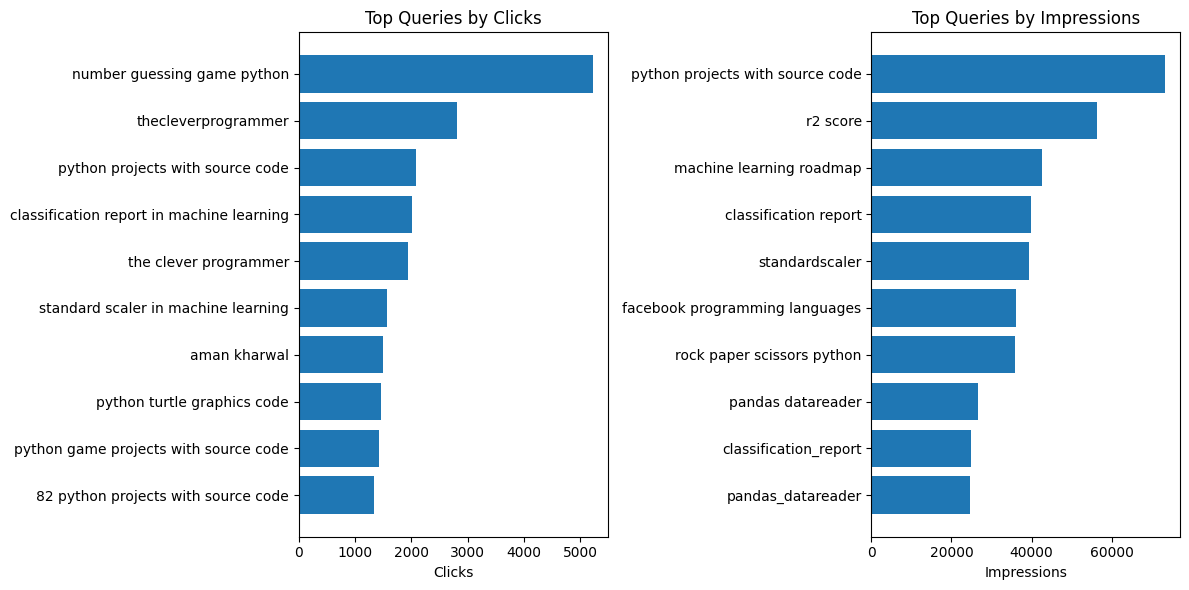

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Top queries', 'Clicks', and 'Impressions'

# Calculate top 10 queries by clicks and impressions
top_clicks = df.sort_values(by='Clicks', ascending=False).head(10)
top_impressions = df.sort_values(by='Impressions', ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot top queries by clicks
axes[0].barh(top_clicks['Top queries'], top_clicks['Clicks'])
axes[0].set_title('Top Queries by Clicks')
axes[0].set_xlabel('Clicks')
axes[0].invert_yaxis()  # To match the image

# Plot top queries by impressions
axes[1].barh(top_impressions['Top queries'], top_impressions['Impressions'])
axes[1].set_title('Top Queries by Impressions')
axes[1].set_xlabel('Impressions')
axes[1].invert_yaxis()  # To match the image

plt.tight_layout()
plt.show()


**Q.5: Analyze the queries with the highest and lowest CTRs**

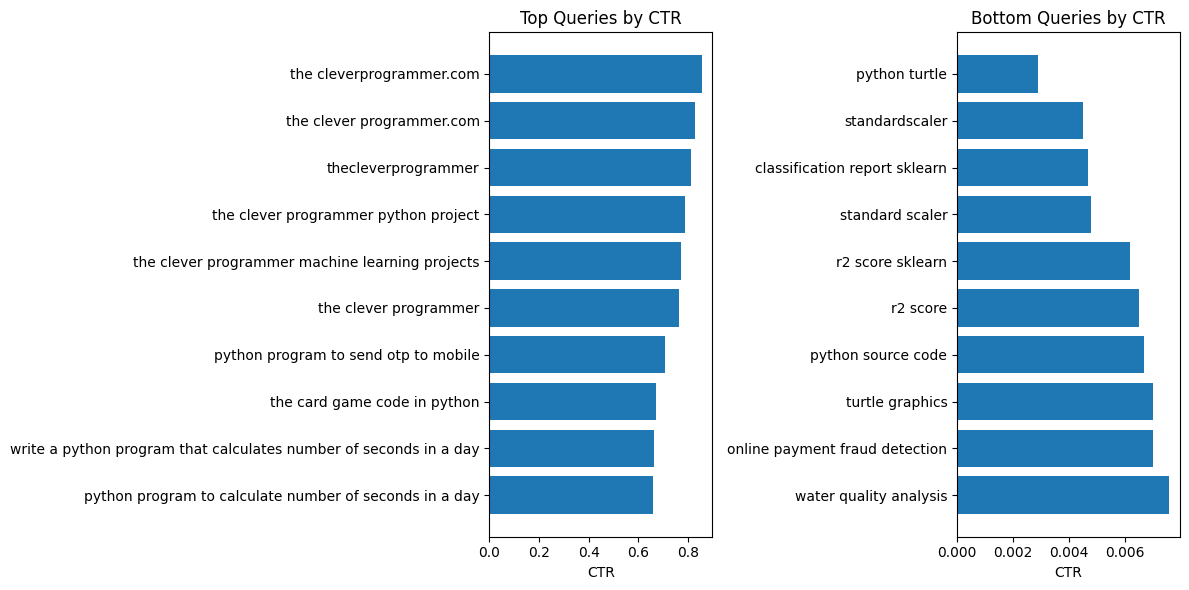

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Top queries', 'CTR'

# Calculate top 10 queries by highest CTR
top_ctr = df.sort_values(by='CTR', ascending=False).head(10)

# Calculate top 10 queries by lowest CTR
bottom_ctr = df.sort_values(by='CTR', ascending=True).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot top queries by CTR
axes[0].barh(top_ctr['Top queries'], top_ctr['CTR'])
axes[0].set_title('Top Queries by CTR')
axes[0].set_xlabel('CTR')
axes[0].invert_yaxis()  # To match the image

# Plot bottom queries by CTR
axes[1].barh(bottom_ctr['Top queries'], bottom_ctr['CTR'])
axes[1].set_title('Bottom Queries by CTR')
axes[1].set_xlabel('CTR')
axes[1].invert_yaxis()  # To match the image

plt.tight_layout()
plt.show()


**Q.6: Correlation analysis between different metrics**

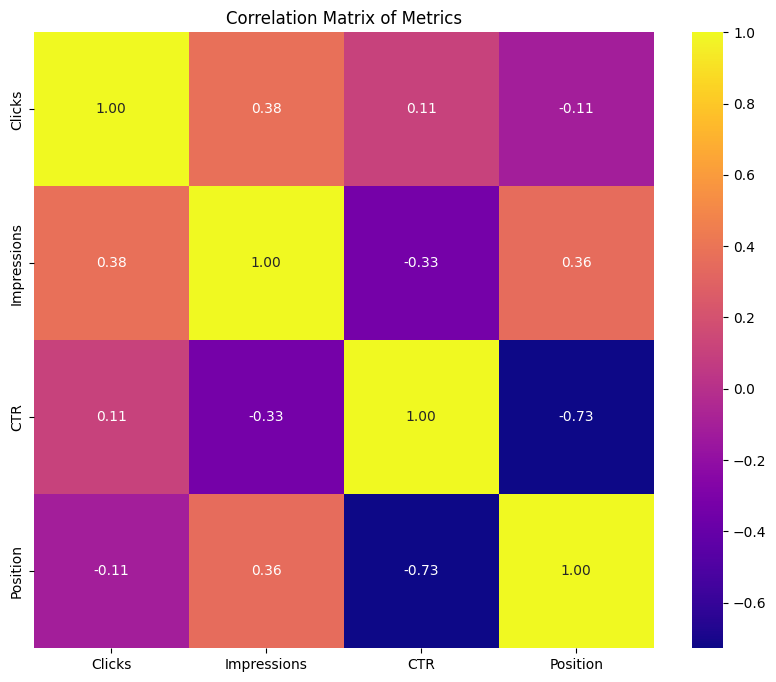

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Matrix of Metrics')
plt.show()


**Q.7: Anomaly detection in search queries**

In [33]:
from sklearn.ensemble import IsolationForest

# Define the features for anomaly detection
selected_features = df[['Clicks', 'Impressions', 'CTR', 'Position']]

# Apply the Isolation Forest algorithm
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = isolation_forest.fit_predict(selected_features)

# Display the anomalies
detected_anomalies = df[df['outlier'] == -1]
print(detected_anomalies)


                                      Top queries  Clicks  Impressions  \
0                     number guessing game python    5223        14578   
1                             thecleverprogrammer    2809         3456   
2                python projects with source code    2077        73380   
3       classification report in machine learning    2012         4959   
4                           the clever programmer    1931         2528   
5             standard scaler in machine learning    1559         7292   
6                                    aman kharwal    1490         5752   
7                     python turtle graphics code    1455        13585   
8           python game projects with source code    1421         4946   
9             82 python projects with source code    1343         3562   
10                        guess the number python    1287         4569   
11                              clever programmer    1243        21566   
12    car price prediction using machi